# Point source plotting basics
In 3ML, we distinguish between **data** and **model** plotting. Data plots contian real data points and the over-plotted model is (sometimes) folded through an instrument response. Therefore, the x-axis is not always in the same *units* across instruments if there is energy dispersion.

However, all instuments see the same model and a multi-wavelength fit can be viewed in model space without complication. 3ML uses one interface to plot both MLE and Bayesian fitted models. To demonstrate we will use toy data simulated from a powerlaw and two gaussians for MLE fits and an exponentially cutoff power law with one gaussian for Bayesian fits.

First we load the analysis results:


In [1]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
%%capture
import matplotlib.pyplot as plt

import astropy.units as u
from threeML import *
from threeML.io.package_data import get_path_of_data_file

In [3]:
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

## Generate some data

23:01:47 INFO      Using Poisson log-likelihood                                                       ]8;id=330830;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=492564;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py#115\115]8;;\

23:01:49 INFO      Using Poisson log-likelihood                                                       ]8;id=672130;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=746404;file:///home/runner/work/threeML/threeML/threeML/plugins/XYLike.py#115\115]8;;\

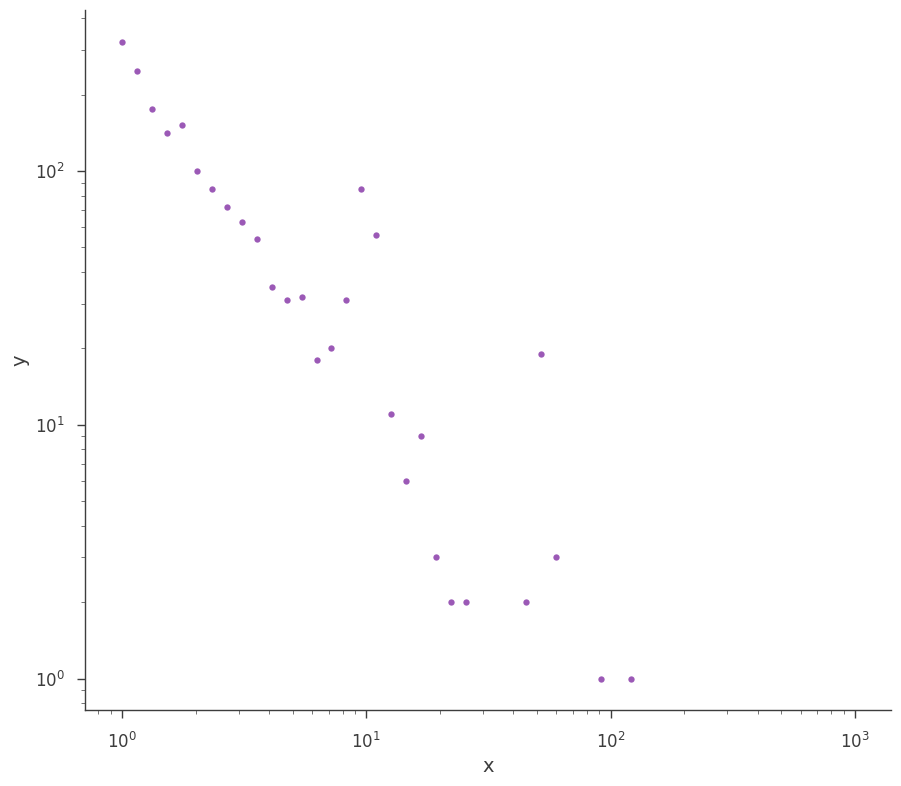

In [4]:
p = Powerlaw(K=10, piv=10, index=-1.5)

p.K.prior = Log_uniform_prior(lower_bound=1, upper_bound=15)
p.index.prior = Uniform_prior(lower_bound=-3, upper_bound=0)

g1 = Gaussian(F=200, mu=10, sigma=1)
g1.F.prior = Log_uniform_prior(lower_bound=100, upper_bound=300)
g1.mu.prior = Log_uniform_prior(lower_bound=1, upper_bound=50)
g1.sigma.prior = Log_uniform_prior(lower_bound=0.01, upper_bound=10)

g2 = Gaussian(F=200, mu=50, sigma=1)
g2.F.prior = Log_uniform_prior(lower_bound=90, upper_bound=300)
g2.mu.prior = Log_uniform_prior(lower_bound=10, upper_bound=100)
g2.sigma.prior = Log_uniform_prior(lower_bound=0.01, upper_bound=2)

f = p + g1 + g2
x = np.logspace(0, 3, 50)

xy = XYLike.from_function("test", f, x, poisson_data=True)

fig = xy.plot(x_scale="log", y_scale="log")

ps = PointSource("test", 0, 0, spectral_shape=f)
model = Model(ps)
dl = DataList(xy)

In [5]:
bayes = BayesianAnalysis(model, dl)
bayes.set_sampler("emcee")
bayes.sampler.setup(n_burn_in=500, n_walkers=100, n_iterations=500)
bayes.sample(quiet=True)
bayes1 = bayes.results

23:01:50 INFO      sampler set to emcee                                                    ]8;id=455069;file:///home/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=773927;file:///home/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

23:02:15 INFO      Mean acceptance fraction: 0.23046000000000003                               ]8;id=809496;file:///home/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=701200;file:///home/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

23:02:22 INFO      fit restored to maximum of posterior                                         ]8;id=893496;file:///home/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=317094;file:///home/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=378987;file:///home/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=605395;file:///home/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

In [6]:
jl = JointLikelihood(model, dl)
jl.fit(quiet=True)
mle1 = jl.results

         INFO      set the minimizer to minuit                                             ]8;id=784032;file:///home/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=856119;file:///home/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1045\1045]8;;\

## Plotting a single analysis result

The easiest way to plot is to call **plot_spectra**. By default, it plots in photon space with a range of 10-40000 keV evaluated at 100 logrithmic points:

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/300 [00:00<?, ?it/s]

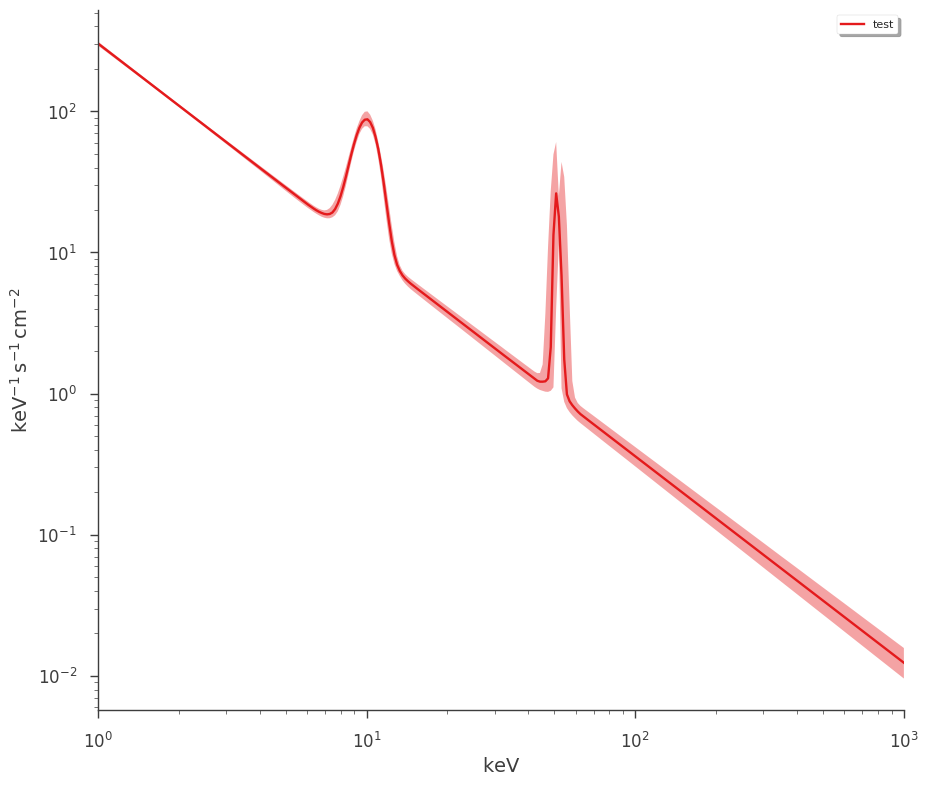

In [7]:
_ = plot_spectra(bayes1, ene_min=1, ene_max=1e3, num_ene=300)

### Flux and energy units
We use astropy units to specify both the flux and energy units.
* The plotting routine understands photon, energy ($F_{\nu}$) and $\nu F_{
\nu}$ flux units;

* energy units can be energy, frequency, or wavelength

* a custom range can be applied.

#### changing flux units


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

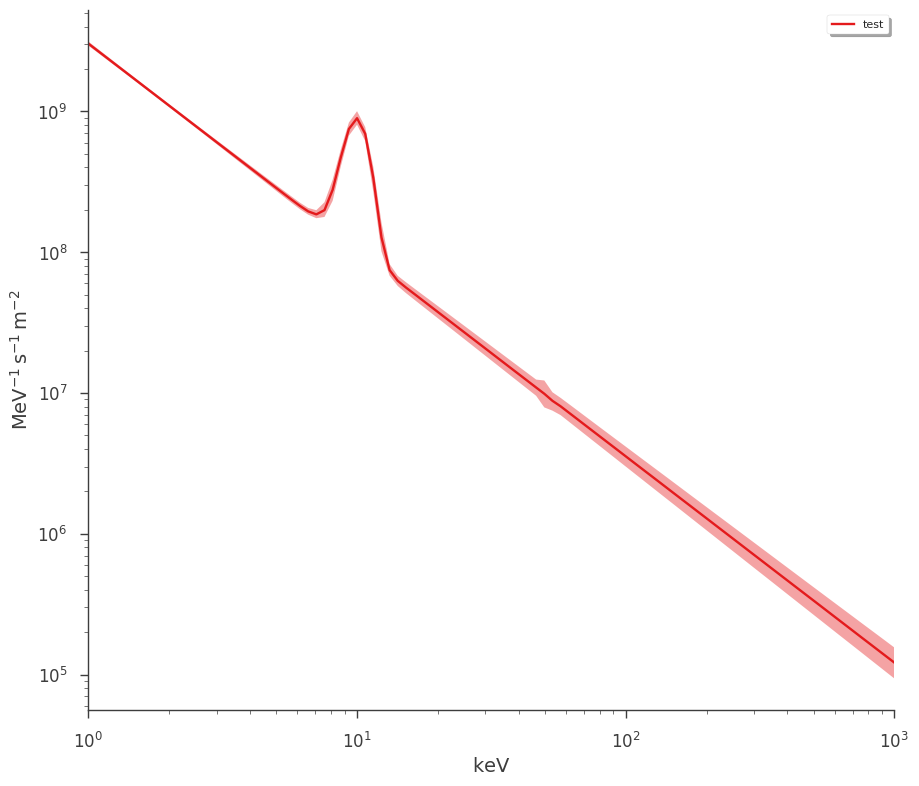

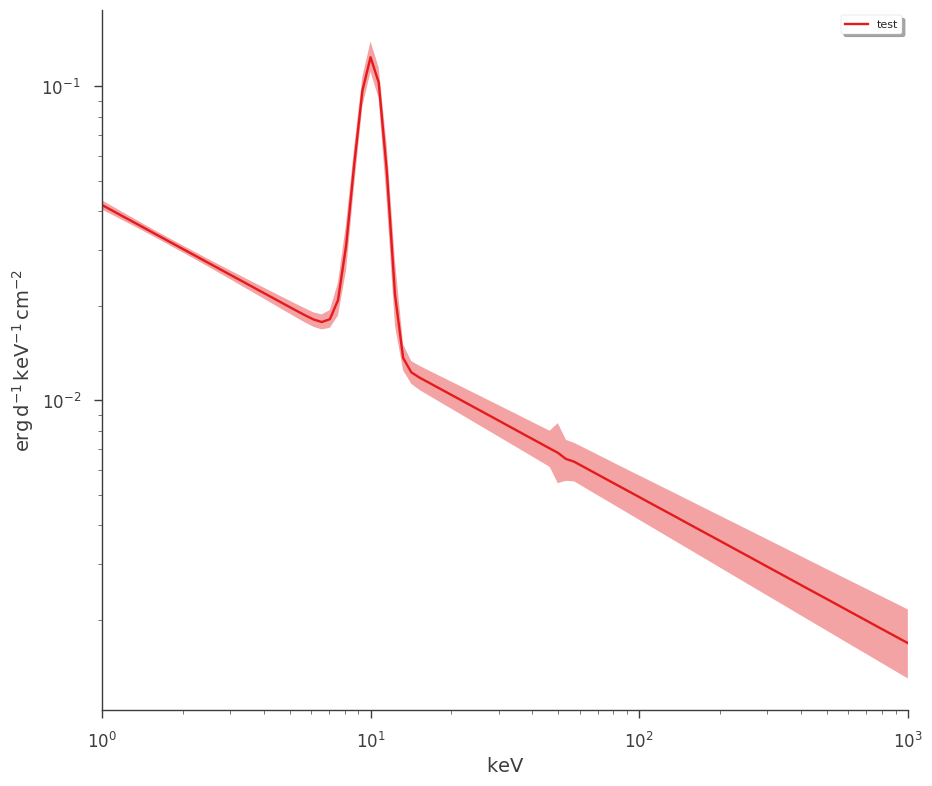

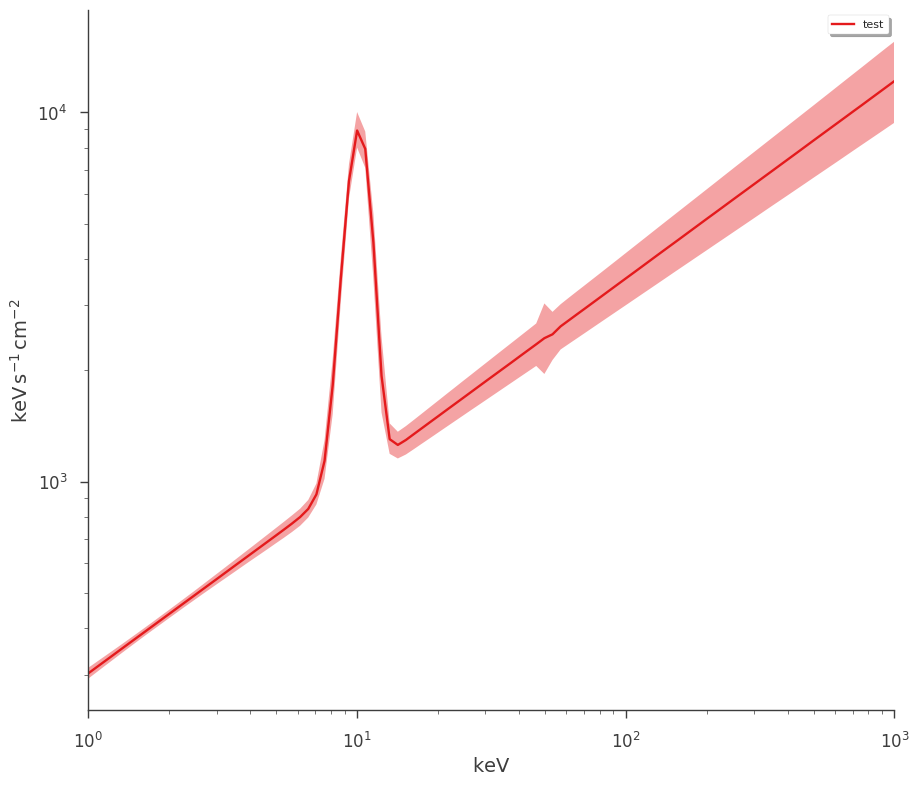

In [8]:
_ = plot_spectra(mle1, ene_min=1, ene_max=1e3, flux_unit="1/(m2 s MeV)")
_ = plot_spectra(mle1, ene_min=1, ene_max=1e3, flux_unit="erg/(cm2 day keV)")
_ = plot_spectra(mle1, ene_min=1, ene_max=1e3, flux_unit="keV2/(cm2 s keV)")

#### changing energy units

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

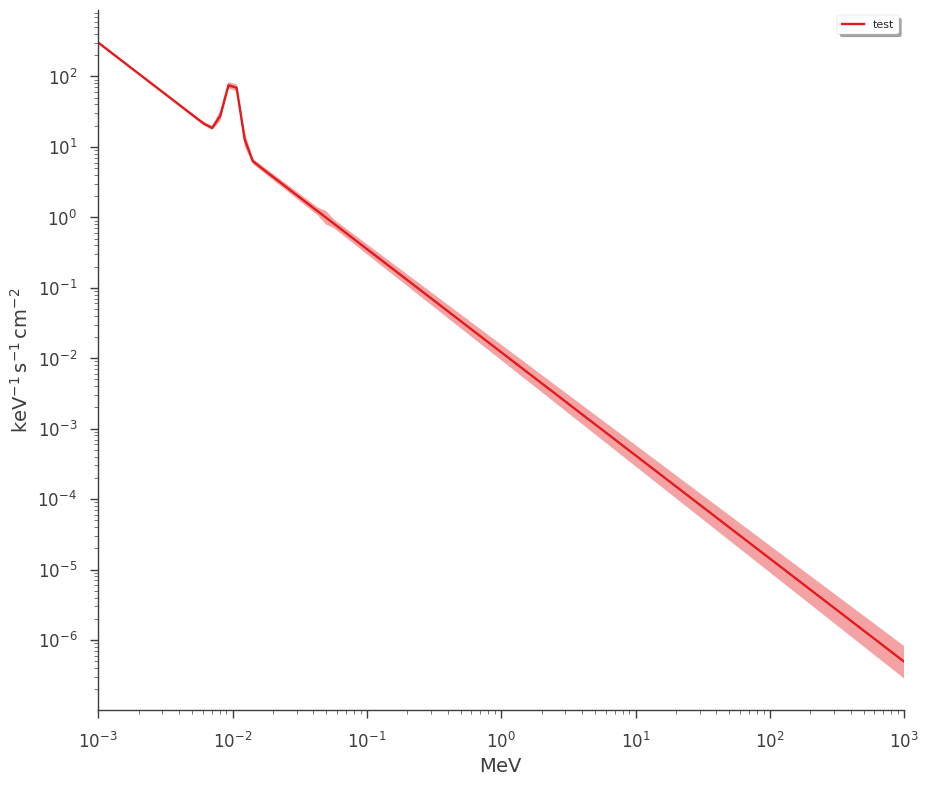

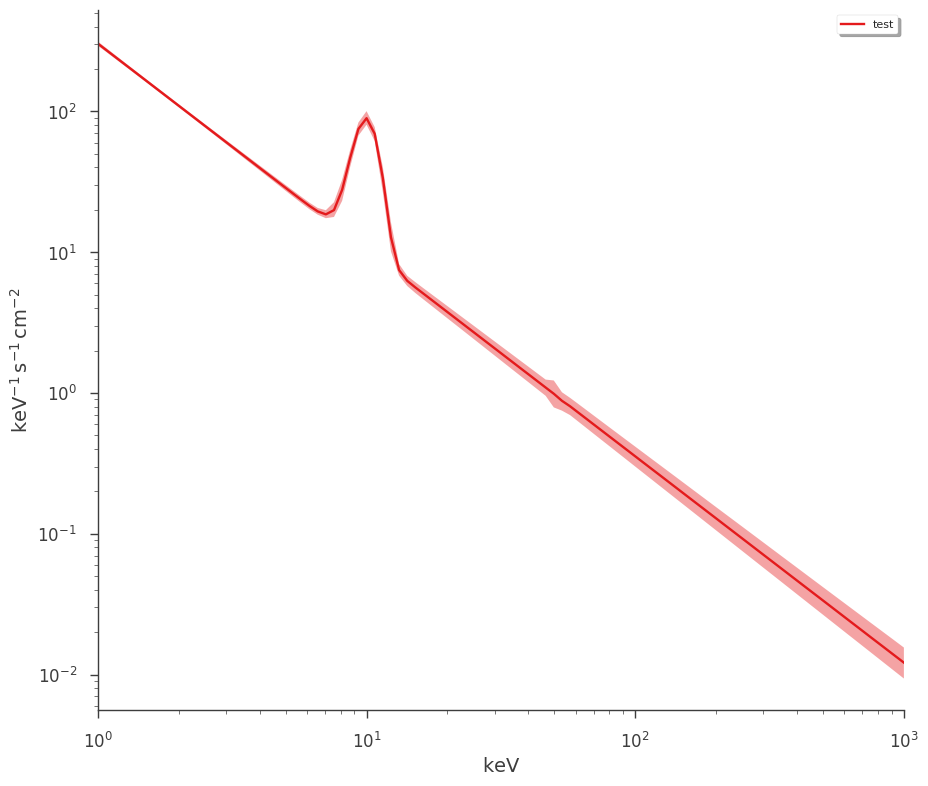

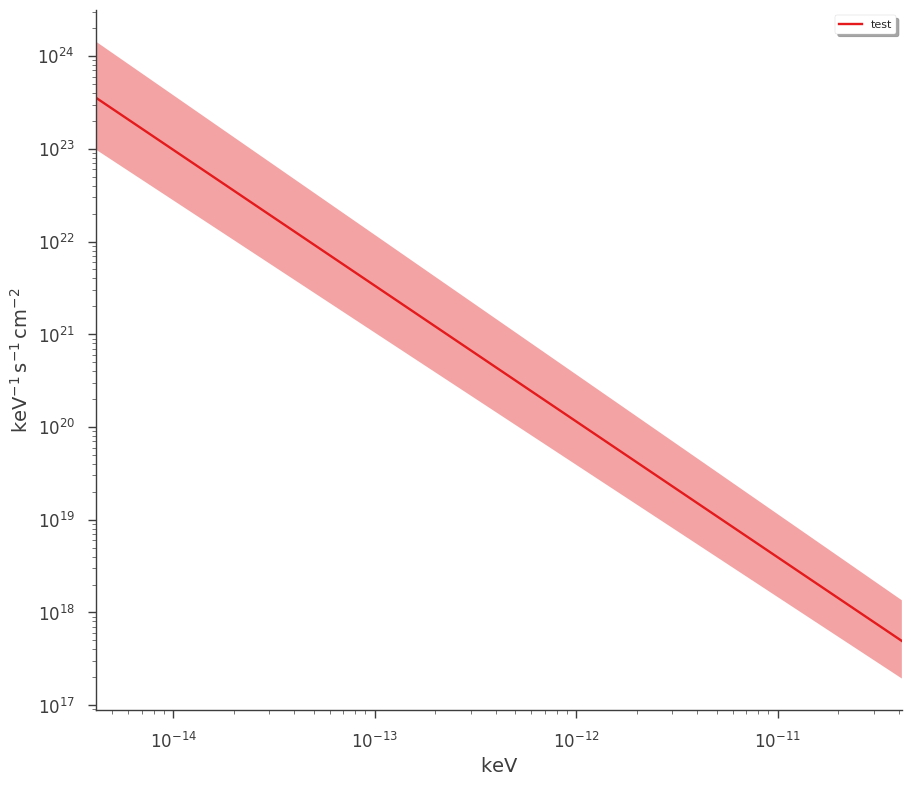

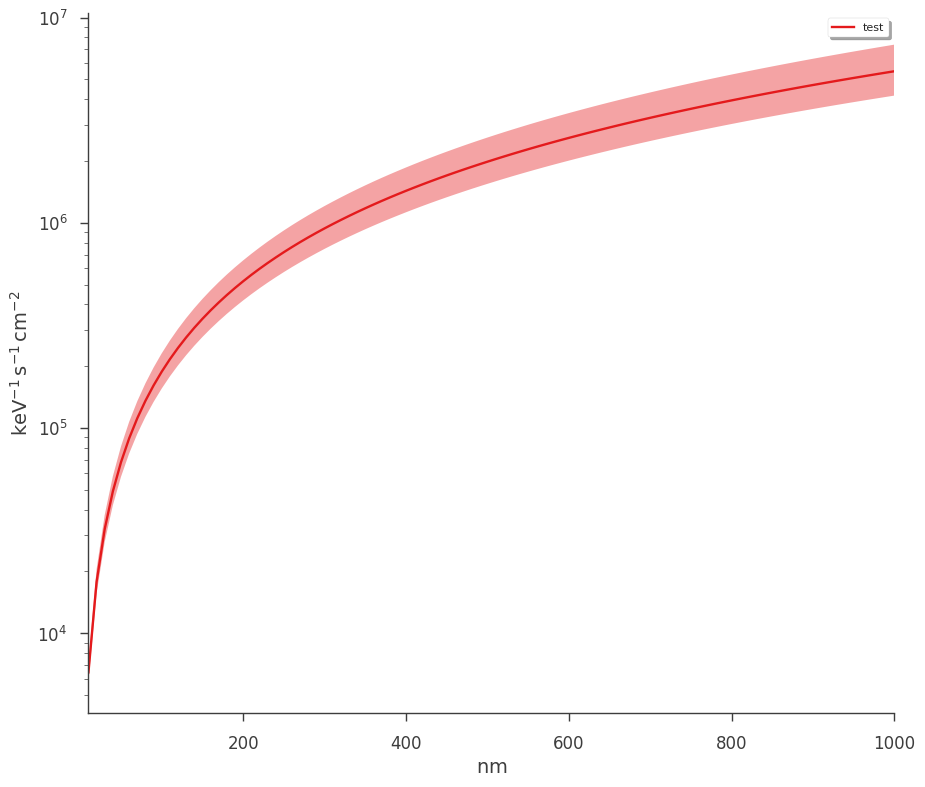

In [9]:
_ = plot_spectra(mle1, ene_min=0.001, ene_max=1e3, energy_unit="MeV")

# energy ranges can also be specified in units
_ = plot_spectra(mle1, ene_min=1 * u.keV, ene_max=1 * u.MeV)

_ = plot_spectra(mle1, ene_min=1e3 * u.Hz, ene_max=1e7 * u.Hz)

_ = plot_spectra(
    mle1, ene_min=1e1 * u.nanometer, ene_max=1e3 * u.nanometer, xscale="linear"
)  # plotting with a linear scale

### Plotting components

Sometimes it is interesting to see the components in a composite model. We can specify the **use_components** switch. Here we will use *Bayesian* results. Note that all features work with MLE of Bayesian results.

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/300 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/300 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/300 [00:00<?, ?it/s]

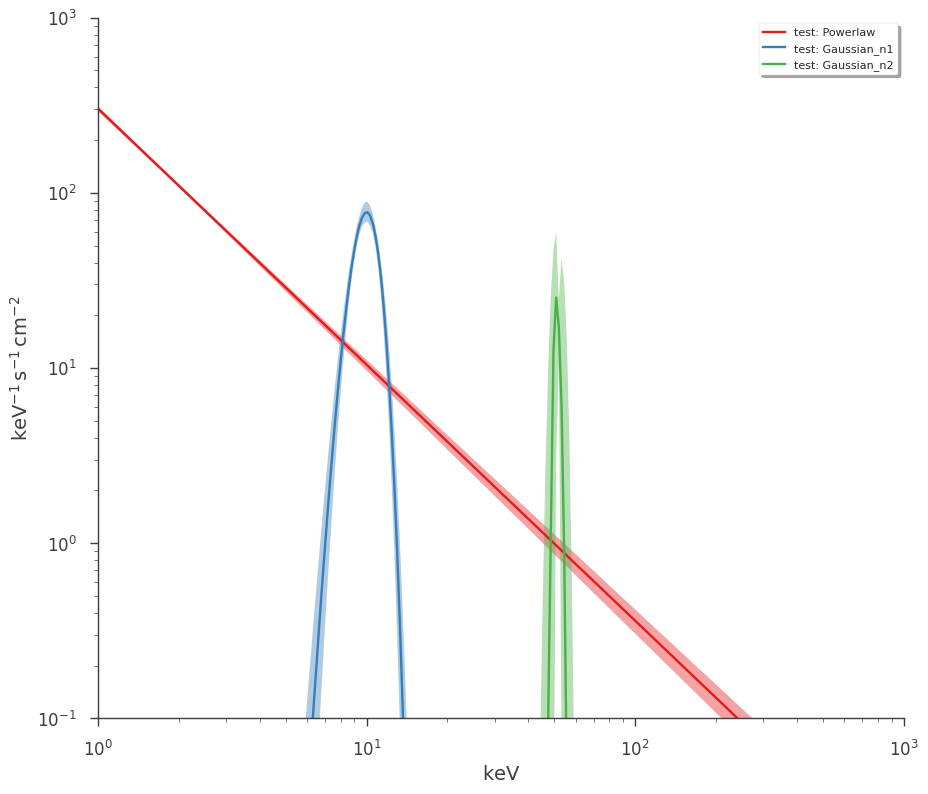

In [10]:
_ = plot_spectra(bayes1, ene_min=1, ene_max=1e3, use_components=True, num_ene=300)

_ = plt.ylim(bottom=0.1, top=1000)

Notice that the duplicated components have the subscripts *n1* and *n2*. If we want to specify which components to plot, we must use these subscripts.

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

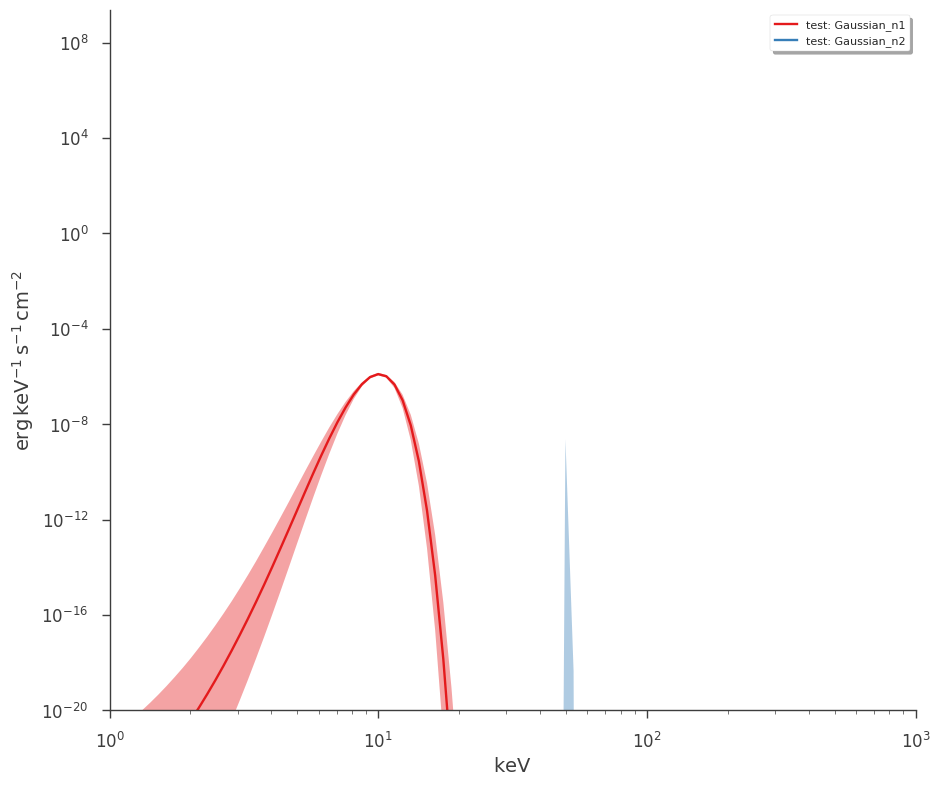

In [11]:
_ = plot_spectra(
    mle1,
    flux_unit="erg/(cm2 s keV)",
    ene_min=1,
    ene_max=1e3,
    use_components=True,
    components_to_use=["Gaussian_n1", "Gaussian_n2"],
)

_ = plt.ylim(bottom=1e-20)

If we want to see the total model with the components, just add *total* to the components list.

Additionally, we can change the confidence interval for the contours from the default of 1$\sigma$ (0.68) to 2$\sigma$ (0.95).

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

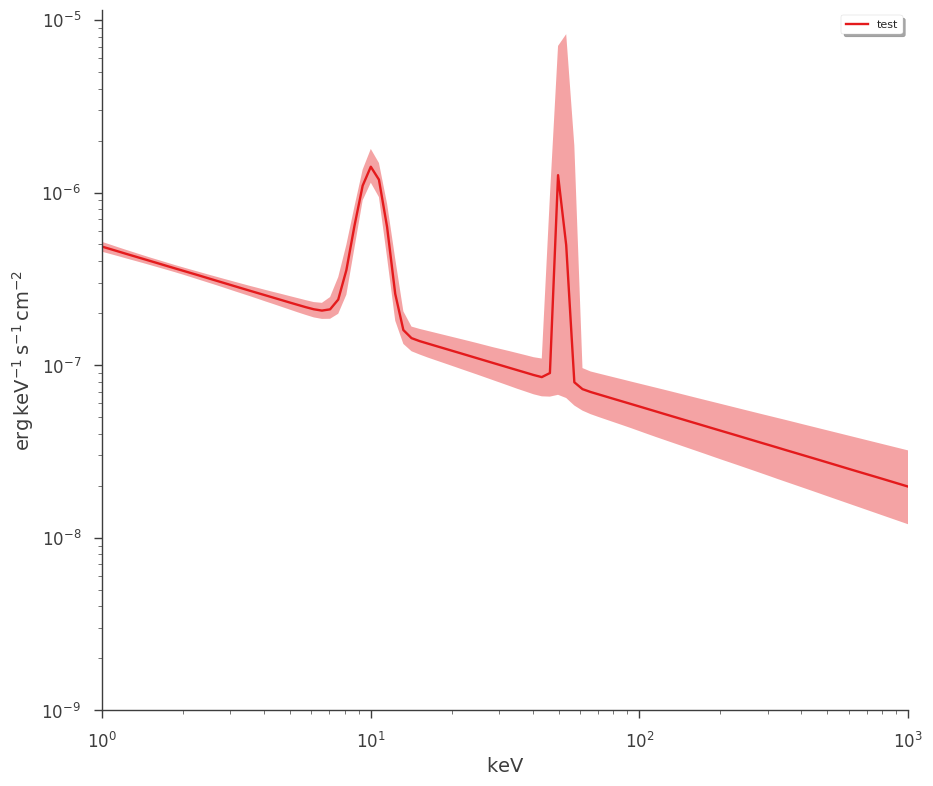

In [12]:
_ = plot_spectra(
    bayes1,
    flux_unit="erg/(cm2 s keV)",
    ene_min=1,
    ene_max=1e3,
    use_components=True,
    components_to_use=["total", "Gaussian"],
    confidence_level=0.95,
)


_ = plt.ylim(bottom=1e-9)

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

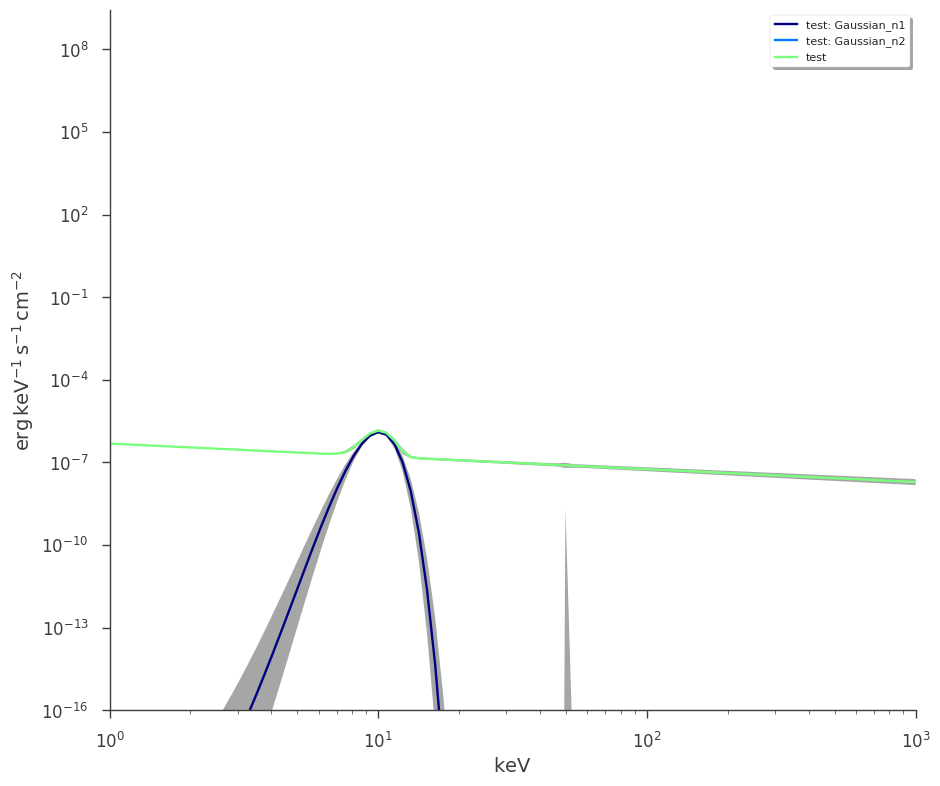

In [13]:
_ = plot_spectra(
    mle1,
    flux_unit="erg/(cm2 s keV)",
    ene_min=1,
    ene_max=1e3,
    use_components=True,
    fit_cmap="jet",  # specify a color map
    contour_colors="k",  # specify a color for all contours
    components_to_use=["total", "Gaussian_n2", "Gaussian_n1"],
)


_ = plt.ylim(bottom=1e-16)

### Additional features
Explore the docstring to see all the available options. Default configurations can be altered in the 3ML config file.


* Use asymmetric errors and alter the default color map

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

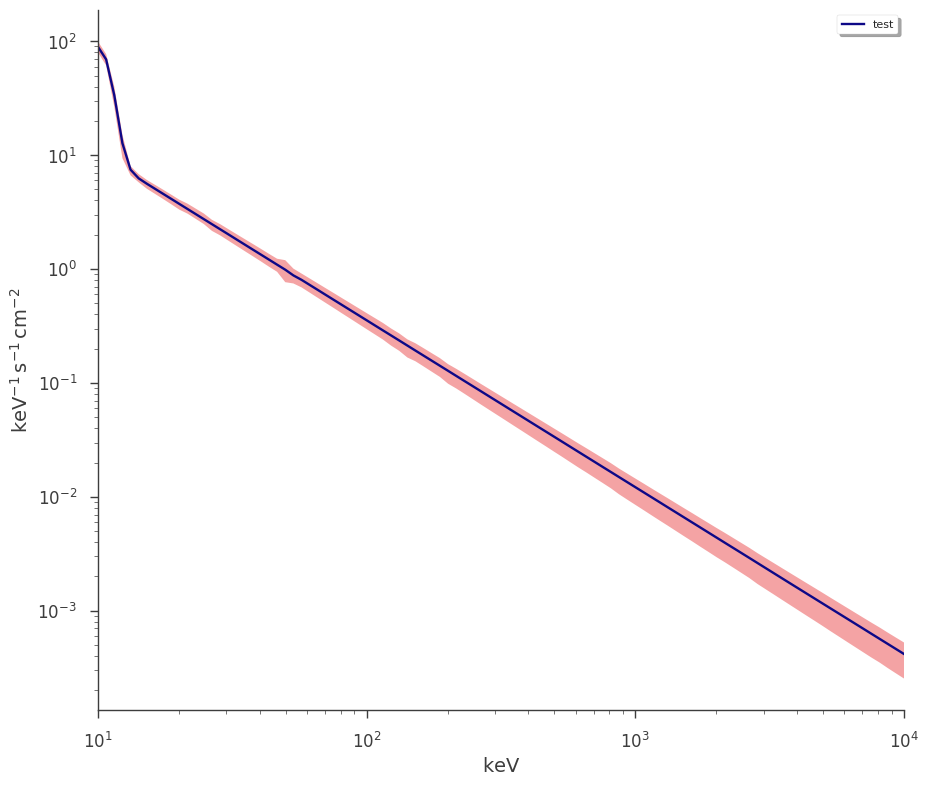

In [14]:
threeML_config["model_plot"]["point_source_plot"]["fit_cmap"] = "plasma"
_ = plot_spectra(mle1, equal_tailed=False)

* turn of contours and the legend and increase the number of points plotted

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/500 [00:00<?, ?it/s]

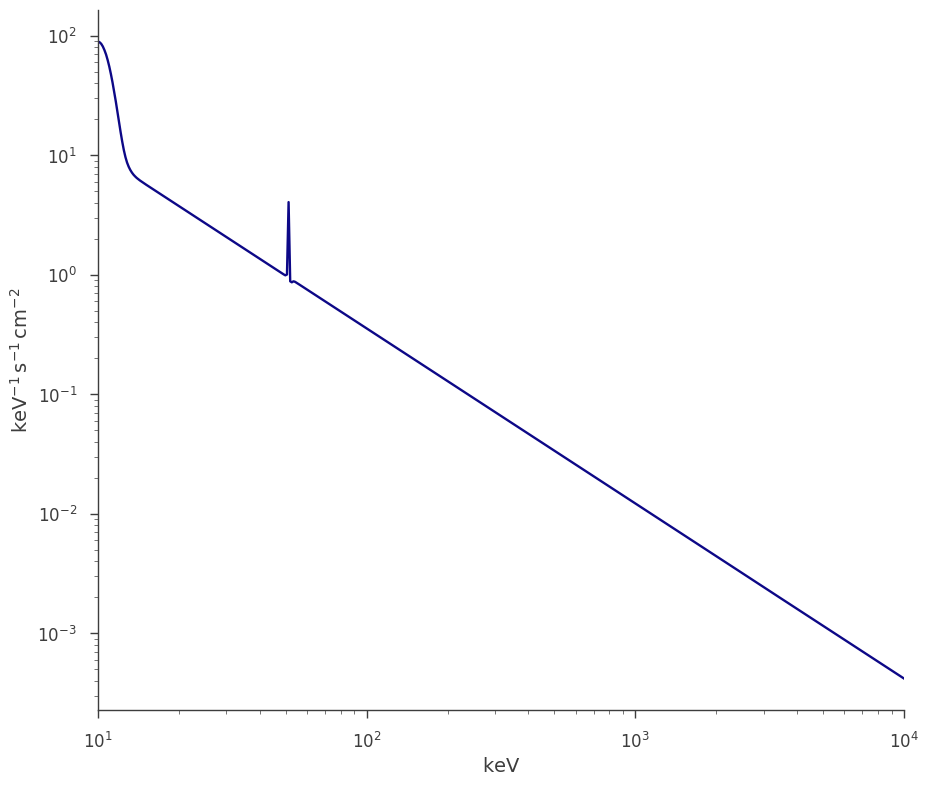

In [15]:
_ = plot_spectra(mle1, show_legend=False, show_contours=False, num_ene=500)

* colors or color maps can be specfied

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

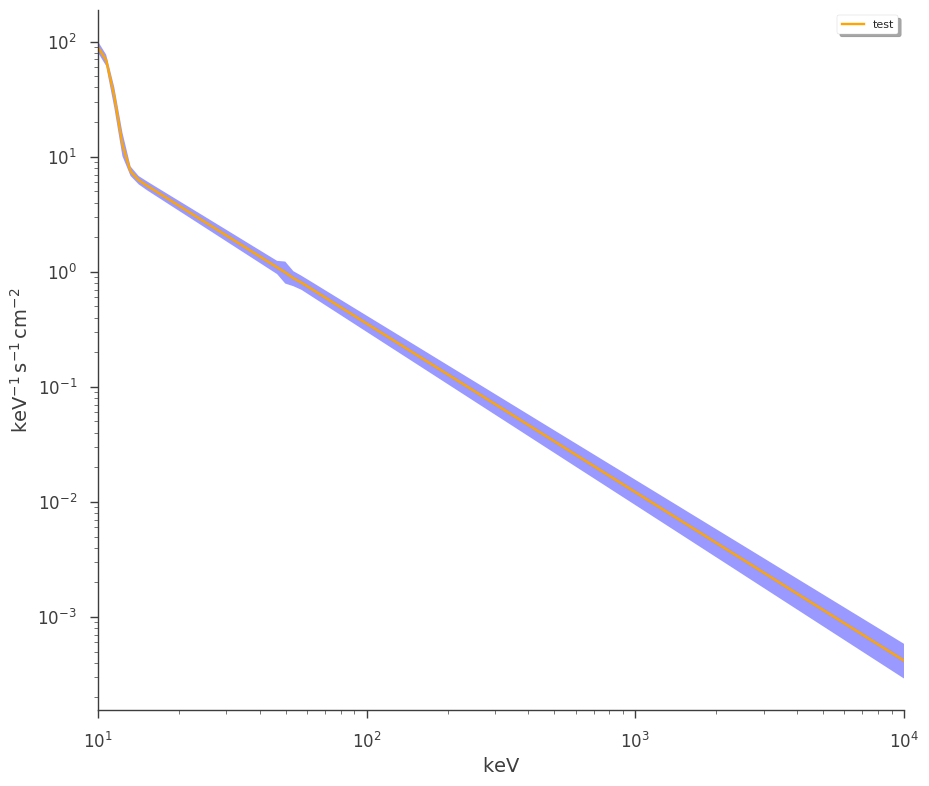

In [16]:
_ = plot_spectra(mle1, fit_colors="orange", contour_colors="blue")

Further modifications to plotting style, legend style, etc. can be modified either in the 3ML configuration:

In [17]:
show_configuration("model_plot")

config
┗━━ point_source_plot
    ┣━━ fit_cmap: MPLCmap.plasma
    ┣━━ contour_cmap: MPLCmap.Set1
    ┣━━ bayes_cmap: MPLCmap.Set1
    ┣━━ plot_style
    ┃   ┣━━ linestyle: -
    ┃   ┗━━ linewidth: 1.7
    ┣━━ contour_style
    ┃   ┗━━ alpha: 0.4
    ┣━━ show_legend: True
    ┣━━ legend_style
    ┃   ┣━━ loc: best
    ┃   ┣━━ fancybox: True
    ┃   ┗━━ shadow: True
    ┣━━ flux_unit: 1/(keV s cm2)
    ┣━━ emin: 10.0
    ┣━━ emax: 10000.0
    ┣━━ num_ene: 100
    ┗━━ ene_unit: keV

or by directly passing dictionary arguments to the the plot command. Examine the docstring for more details!

## Plotting multiple results

Any number of results can be plotted together. Simply provide them as arguments. You can mix and match MLE and Bayesian results as well as plotting their components.

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

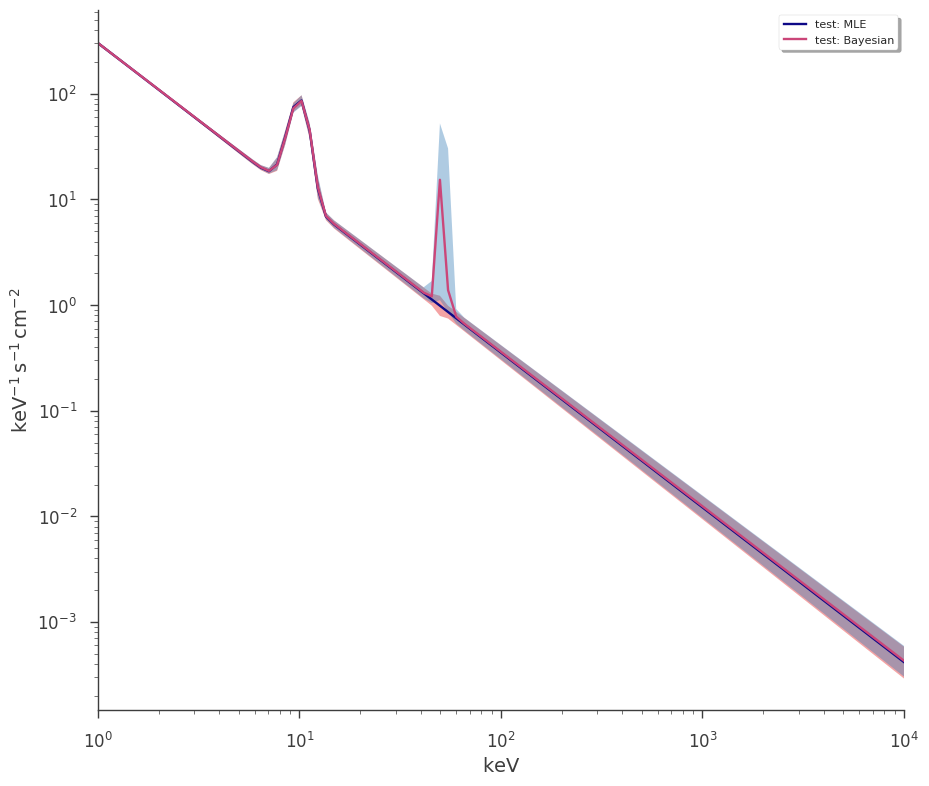

In [18]:
_ = plot_spectra(mle1, bayes1, ene_min=1)

# _=plt.ylim(bottom=1E-1)

Specify particular colors for each analysis and broaden the contours

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

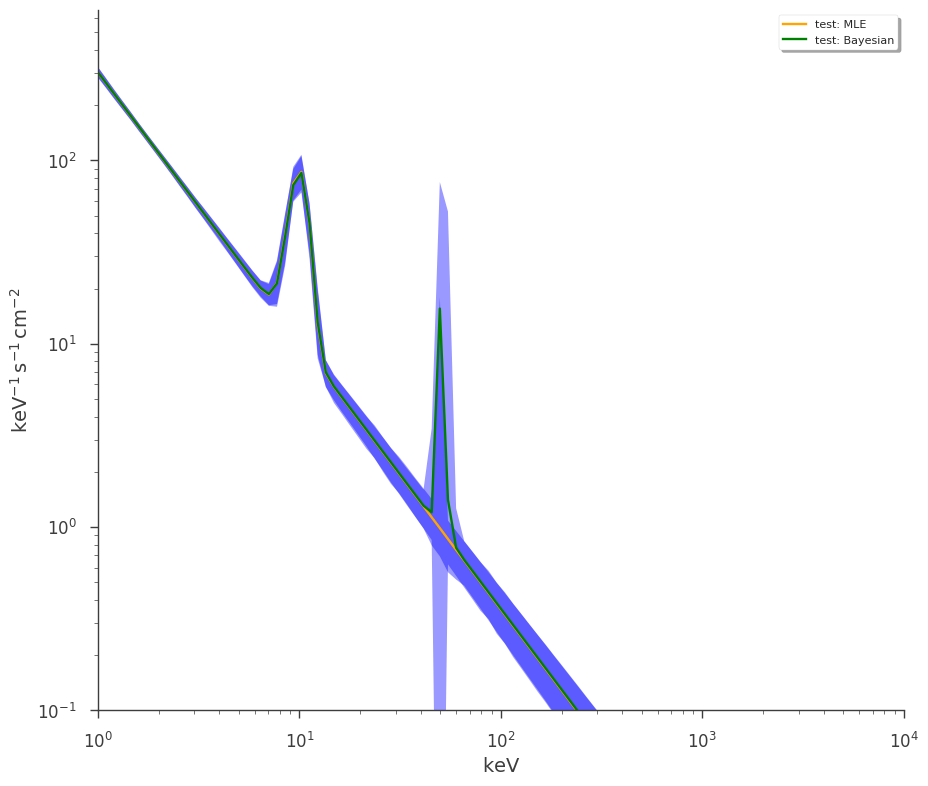

In [19]:
_ = plot_spectra(
    mle1,
    bayes1,
    ene_min=1.0,
    confidence_level=0.95,
    equal_tailed=False,
    fit_colors=["orange", "green"],
    contour_colors="blue",
)
_ = plt.ylim(bottom=1e-1)

As with single results, we can choose to plot the components for all the sources.

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

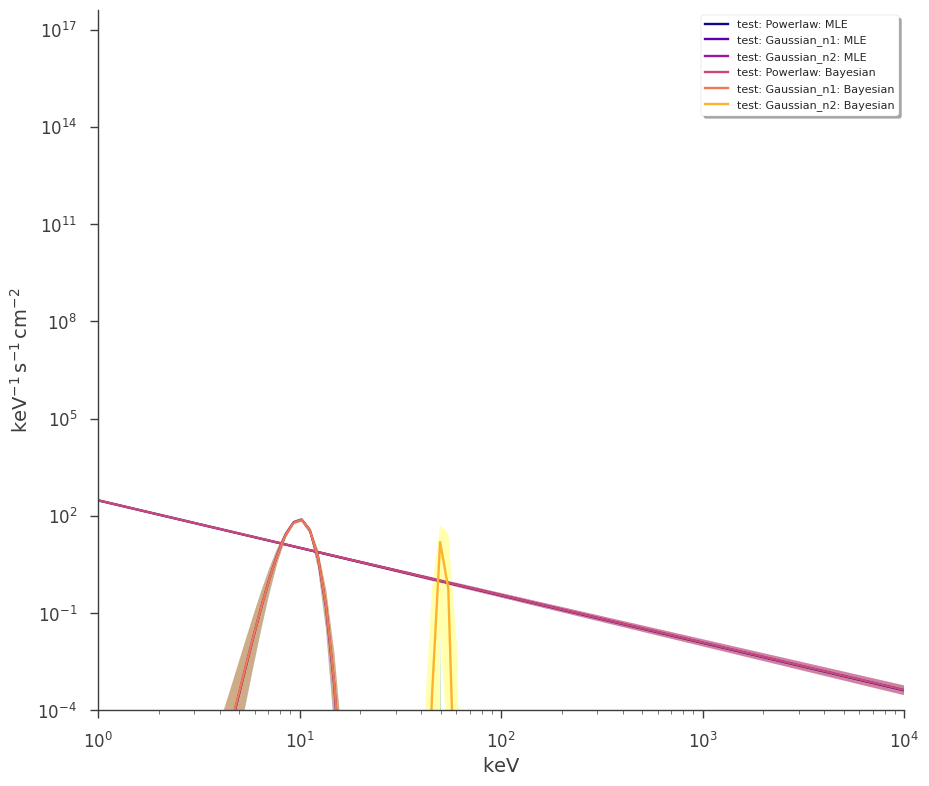

In [20]:
_ = plot_spectra(mle1, bayes1, ene_min=1.0, use_components=True)
_ = plt.ylim(bottom=1e-4)